In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [ ]:

df = pd.read_csv('/content/creditcard.csv')
df.head()
df.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,1
V7,1
V8,1
V9,1


In [ ]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df = df.drop(columns=['Time'])
df['Class'].value_counts()


,count
Class,
0.0,45503
1.0,142


In [ ]:
df['Class'] = df['Class'].fillna(df['Class'].mode()[0])
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print('Class distribution after SMOTE:', np.bincount(y_train_res))

Class distribution after SMOTE: [31853 31853]


In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_res, y_train_res)
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_res, y_train_res)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred_log = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
print("Logistic Regression Model:")
print(classification_report(y_test, y_pred_log))
print("Random Forest Model:")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Model:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     13651
         1.0       0.19      0.93      0.31        43

    accuracy                           0.99     13694
   macro avg       0.59      0.96      0.65     13694
weighted avg       1.00      0.99      0.99     13694

Random Forest Model:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13651
         1.0       0.98      0.95      0.96        43

    accuracy                           1.00     13694
   macro avg       0.99      0.98      0.98     13694
weighted avg       1.00      1.00      1.00     13694



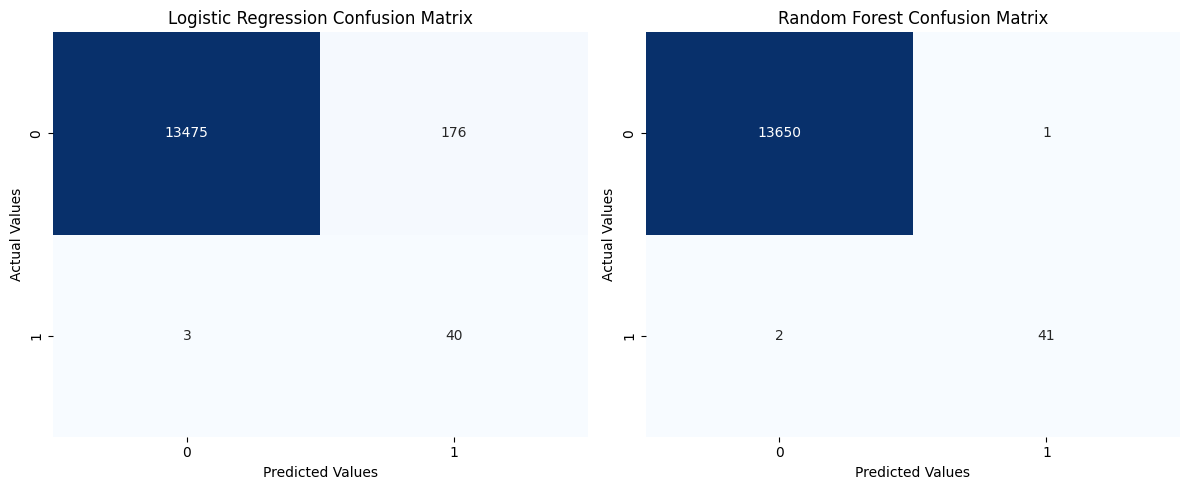

In [ ]:
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.subplot(1,2,2)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.tight_layout()
plt.show()
